In [1]:
import pandas as pd
import altair as alt

In [2]:
dh_tools = pd.read_csv("../datasets/tools-dh-proceedings.csv")

In [3]:
melted_dh_tools = dh_tools.melt(id_vars=['Tool'], var_name='year', value_name='counts')

In [4]:
melted_dh_tools['date'] = melted_dh_tools['year'].astype(str) + '-01-01'
melted_dh_tools['date'] = pd.to_datetime(melted_dh_tools['date'])

In [5]:
grouped_dh_tools = melted_dh_tools.groupby(['Tool'])['counts'].sum().reset_index()

In [6]:
palladio = grouped_dh_tools[grouped_dh_tools['Tool'] == 'Palladio'].counts.values[0]
palladio

15

In [7]:
network_tools = ['Gephi', 'Palladio']
tools_over_time = alt.Chart(melted_dh_tools[melted_dh_tools.Tool.isin(network_tools)]).mark_bar().encode(
    x=alt.X('date:T', timeUnit='year', axis=alt.Axis(title="Year")),
    y=alt.Y('sum(counts):Q', stack=None),
    color=alt.Color('Tool:N', legend=alt.Legend(title="Tool"), scale=alt.Scale( domain=network_tools, range=['#6b6ecf', '#ff7f0e']))
)


In [8]:
updated_network_tools = grouped_dh_tools[grouped_dh_tools.counts >= palladio].Tool.unique().tolist()
updated_network_tools = [tool for tool in updated_network_tools if tool not in network_tools]
updated_network_colors = ['#1f77b4' for tool in updated_network_tools]
updated_network_colors = updated_network_colors + ['#6b6ecf', '#ff7f0e']
updated_network_tools = updated_network_tools + network_tools

In [9]:

total_tools = alt.Chart(grouped_dh_tools[grouped_dh_tools.counts >= palladio]).mark_bar().encode(
    x=alt.X('counts:Q', title='Number of mentions'),
    y=alt.Y('Tool:N', title='Tool', sort='-x'),
    color=alt.Color('Tool:N', legend=None, scale=alt.Scale(domain=updated_network_tools, range=updated_network_colors)),
)

In [10]:
footnote = alt.Chart(pd.DataFrame({'footnote': ["WHICH DH TOOLS ARE ACTUALLY USED IN RESEARCH? BY LAURE BARBOT, FRANK FISCHER, YOANN MORANVILLE AND IVAN POZDNIAKOV — 06 DEC 2019"]})
).mark_text(size=10).encode(
    text='footnote:N'
)

In [11]:
# Concatenate the two charts horizontally, resolve the color scales independently, and apply the title
charts = alt.hconcat(total_tools, tools_over_time)\
    .resolve_scale(color='independent')\
    .properties(title='Tools Mentioned in DH Conference Abstracts, 2015-2019')

# Concatenate the charts with the footnote vertically
final_chart = alt.vconcat(charts, footnote)

# Apply the configuration to the final chart
final_chart = final_chart.configure(
        title=alt.TitleConfig(fontSize=20, font='Garamond'),
        axis=alt.AxisConfig(labelFont='Garamond', titleFont='Garamond'),
        legend=alt.LegendConfig(labelFont='Garamond', titleFont='Garamond')
    )

final_chart

alt.VConcatChart(...)

In [12]:
alt.hconcat(total_tools, tools_over_time)\
    .resolve_scale(color='independent')\
    .properties(title='Tools Mentioned in DH Conference Abstracts, 2015-2019')\
    .configure(
        title=alt.TitleConfig(fontSize=20, font='Garamond'),
        axis=alt.AxisConfig(labelFont='Garamond', titleFont='Garamond'),
        legend=alt.LegendConfig(labelFont='Garamond', titleFont='Garamond')
    )

alt.HConcatChart(...)

In [51]:
# jstor_df = pd.read_csv("../datasets/private_data/combined_journal_data.csv")
dhq_df = pd.read_csv("../datasets/private_data/cleaned_dhq_data.csv")

In [52]:
dhq_df = dhq_df.drop_duplicates(subset=['issue_index_article_title', 'issue_index_article_authors'])

In [53]:
dhq_df[0:1]

issue_index_title issue_index_editors  \
0          Articles                 NaN   

                         issue_index_article_authors  \
0  Jerry Bonnell, Department of Computer Science,...   

                            issue_index_article_link  \
0  http://www.digitalhumanities.org/dhq/vol/16/4/...   

                           issue_index_article_title  \
0  Rule-based Adornment\n               of Modern...   

                        issue_index_article_abstract issue_index_issue_text  \
0  Abstract\n                [en]\n            \n...             2022: 16.4   

                              issue_index_issue_link  \
0  http://www.digitalhumanities.org/dhq/vol/16/4/...   

                                   full_article_text  \
0  [[<div class="div div0">\n<h1 class="head">1. ...   

                               full_article_abstract  ... volume  issue  \
0  Abstract\nHistorical materials are an indispen...  ...     16      4   

     month date_published                                word_tokenized_text  \
0  October     2022-10-01  ['1', '.', 'Introduction', '1Scholarly', 'work...   

                             sentence_tokenized_text word_count  \
0  ['1.', 'Introduction\n1Scholarly workflows in ...        560   

  sentence_count  string_length  \
0             15           3767   

                           lower_full_extracted_text  
0  1. introduction\n1scholarly workflows in the d...  

[1 rows x 29 columns]

In [54]:
dhq_df['tool_count'] = dhq_df.lower_full_extracted_text.str.count('tool')
dhq_df['gephi_count'] = dhq_df.lower_full_extracted_text.str.count('gephi')
dhq_df['palladio_count'] = dhq_df.lower_full_extracted_text.str.count('palladio')
dhq_df['network_count'] = dhq_df.lower_full_extracted_text.str.count('network')
dhq_df['infrastructure_count'] = dhq_df.lower_full_extracted_text.str.count('infrastructur*')
dhq_df['article_length'] = dhq_df.lower_full_extracted_text.str.len()
dhq_df['date_published'] = pd.to_datetime(dhq_df['date_published'], errors='coerce')

In [56]:
dhq_df[dhq_df.lower_full_extracted_text.str.contains('palladio', na=False)][['article_length', 'palladio_count']].describe()

article_length  palladio_count
count             1.0             1.0
mean           8191.0            18.0
std               NaN             NaN
min            8191.0            18.0
25%            8191.0            18.0
50%            8191.0            18.0
75%            8191.0            18.0
max            8191.0            18.0

In [57]:
tools_df = dhq_df[['tool_count', 'gephi_count', 'palladio_count', 'network_count', 'infrastructure_count', 'article_length', 'date_published', 'issue_index_article_link', 'word_count']].copy()

In [58]:
tools_df.to_csv("../datasets/tools_in_dhq.csv", index=False)

In [59]:
melted_df = pd.melt(tools_df, id_vars=['date_published', 'issue_index_article_link', 'word_count', 'article_length'], var_name='tool', value_name='counts')

In [60]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [61]:
melted_df.tool = melted_df.tool.str.replace('_count', '')
melted_df.tool = melted_df.tool.str.capitalize()    

In [62]:
network_tools = alt.Chart(melted_df[melted_df.tool.isin(['Gephi', 'Palladio'])]).mark_bar().encode(
    x=alt.X('date_published:T', timeUnit='year', axis=alt.Axis(title="Year")),
    y=alt.Y('sum(counts):Q'),
    color=alt.Color('tool:N', legend=alt.Legend(title="Tool"), scale=alt.Scale( domain=['Gephi', 'Palladio'], range=['#6b6ecf', '#ff7f0e']))
).properties(title='Tools Mentioned in DHQ Articles, 2007-2019')

In [63]:
melted_df.tool.unique()

array(['Tool', 'Gephi', 'Palladio', 'Network', 'Infrastructure'],
      dtype=object)

In [68]:
selection = alt.selection_point(fields=['tool'], bind='legend')
networks_chart = alt.Chart(melted_df[melted_df.tool != 'Infrastructure']).mark_bar().encode(
    x=alt.X('date_published:T', timeUnit='year', axis=alt.Axis(title="Year")),
    y=alt.Y('sum(counts):Q'),
    color=alt.Color('tool:N', legend=alt.Legend(title="Tool"), scale=alt.Scale( domain=['Network', 'Gephi', 'Palladio', 'Tool'], range=['#1f77b4', '#6b6ecf', '#ff7f0e', '#e7969c'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).add_params(selection).properties(title='Network Tools and Networks Mentioned in DHQ Articles, 2007-2019')

In [69]:
networks_chart

alt.Chart(...)

In [70]:
alt.hconcat(network_tools, networks_chart).resolve_scale(color='independent').configure(
        title=alt.TitleConfig(fontSize=20, font='Garamond'),
        axis=alt.AxisConfig(labelFont='Garamond', titleFont='Garamond'),
        legend=alt.LegendConfig(labelFont='Garamond', titleFont='Garamond')
    )

alt.HConcatChart(...)

In [37]:
# Import the dataset from the provided URL
tools_df = pd.read_csv("https://raw.githubusercontent.com/jrladd/edge-cases-JDH/main/explorations/datasets/tools_in_dhq.csv")

# Reshape the DataFrame from wide to long format
melted_df = pd.melt(tools_df, id_vars=['date_published', 'issue_index_article_link', 'word_count', 'article_length'], var_name='tool', value_name='counts')

# Replace '_count' in 'tool' column with an empty string and capitalize the tool names
melted_df.tool = melted_df.tool.str.replace('_count', '')
melted_df.tool = melted_df.tool.str.capitalize()

# Create a bar chart of 'counts' over 'date_published' for 'Gephi' and 'Palladio'
network_tools = alt.Chart(melted_df[melted_df.tool.isin(['Gephi', 'Palladio'])]).mark_bar().encode(
    x=alt.X('date_published:T', timeUnit='year', axis=alt.Axis(title="Year")),
    y=alt.Y('sum(counts):Q'),
    color=alt.Color('tool:N', legend=alt.Legend(title="Tool"), scale=alt.Scale( domain=['Gephi', 'Palladio'], range=['#6b6ecf', '#ff7f0e']))
).properties(title='Network Tools Mentioned in DHQ Articles, 2007-2019')

# Create an interactive selection tool for the legend items
selection = alt.selection_multi(fields=['tool'], bind='legend')

# Create another bar chart that is responsive to the selection tool
networks_chart = alt.Chart(melted_df).mark_bar().encode(
    x=alt.X('date_published:T', timeUnit='year', axis=alt.Axis(title="Year")),
    y=alt.Y('sum(counts):Q'),
    color=alt.Color('tool:N', legend=alt.Legend(title="Tool"), scale=alt.Scale( domain=['Network', 'Gephi', 'Palladio', 'Tool', 'Infrastructure'], range=['#1f77b4', '#6b6ecf', '#ff7f0e', '#e7969c', ])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))  # Change the opacity based on the selection
).add_selection(selection).properties(title='Network Tools Mentioned vs Mentions of Networks or Tools in DHQ Articles, 2007-2019')

# Create a text chart for the footnote
footnote = alt.Chart(pd.DataFrame({'footnote': ["DHQ Articles accessed via webscraping"]})).mark_text(size=10).encode(
    text='footnote:N'
)

# Concatenate the two charts horizontally, resolve the color scales independently, and apply the title
charts = alt.hconcat(network_tools, networks_chart).resolve_scale(color='independent')

# Concatenate the charts with the footnote vertically
final_chart = alt.vconcat(charts, footnote)

# Apply the configuration to the final chart
final_chart = final_chart.configure(
        title=alt.TitleConfig(fontSize=20, font='Garamond'),
        axis=alt.AxisConfig(labelFont='Garamond', titleFont='Garamond'),
        legend=alt.LegendConfig(labelFont='Garamond', titleFont='Garamond')
    )

final_chart


/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning)
/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning)


alt.VConcatChart(...)

In [71]:
selection = alt.selection_point(fields=['tool'], bind='legend')
infrastructure_chart = alt.Chart(melted_df[melted_df.tool.isin(['Infrastructure'])]).mark_bar().encode(
    x=alt.X('date_published:T', timeUnit='year', axis=alt.Axis(title="Year")),
    y=alt.Y('sum(counts):Q'),
    color=alt.Color('tool:N', legend=alt.Legend(title="Tool"), scale=alt.Scale( domain=[ 'Infrastructure'], range=['#2ca02c'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).add_params(selection).properties(title='Infrastructure Mentioned in DHQ Articles, 2007-2019')

In [72]:
infrastructure_chart

alt.Chart(...)

In [34]:
grouped_dhq = dhq_df.groupby('date_published', as_index=False).agg({'tool_count': 'sum', 'article_length': 'sum'})
grouped_dhq['tool_count_per_article'] = grouped_dhq.tool_count / grouped_dhq.article_length * 100

<Axes: xlabel='date_published'>

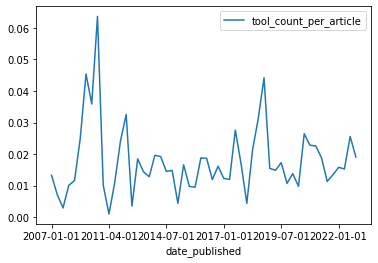

In [35]:
grouped_dhq.plot(x='date_published', y='tool_count_per_article')

In [36]:
dhq_df.sort_values(by='tool_count', ascending=False).head(5)

issue_index_title  \
3996  Special Cluster: e-Science for the Arts and Hu...   
880                              AudioVisual Data in DH   
3578                      Futures of Digital Studies: 2   
3876                                           Articles   
3692                                           Articles   

                                    issue_index_editors  \
3996             Editors: Stuart Dunn and Tobias Blanke   
880   Editors: Taylor Arnold, Jasmijn van Gorp, Stef...   
3578         Editors: Mauro Carassai and Elise Takehana   
3876                                                NaN   
3692                                                NaN   

                            issue_index_article_authors  \
3996  Ray Siemens, University of Victoria; Cara Leit...   
880   Eric Kaltman, Department of Computer Science, ...   
3578  Fred Gibbs, George Mason University; Trevor Ow...   
3876          Patrik Svensson, HUMlab, UmeÃ¥ University   
3692  Ray Siemens, University of Victoria; Meagan Ti...   

                               issue_index_article_link  \
3996  http://www.digitalhumanities.org/dhq/vol/3/4/0...   
880   http://www.digitalhumanities.org/dhq/vol/15/1/...   
3578  http://www.digitalhumanities.org/dhq/vol/6/2/0...   
3876  http://www.digitalhumanities.org/dhq/vol/4/1/0...   
3692  http://www.digitalhumanities.org/dhq/vol/6/1/0...   

                              issue_index_article_title  \
3996  \n               âIt May Change My Understan...   
880   From the Presupposition of Doom to the Manifes...   
3578  Building Better Digital Humanities Tools: Towa...   
3876                The Landscape of Digital Humanities   
3692  Pertinent Discussions Toward Modeling the Soci...   

                           issue_index_article_abstract  \
3996  Abstract\n                [en]\n            As...   
880   Abstract\n                [en]\n            \n...   
3578  Abstract\n                [en]\n              ...   
3876  Abstract\n                [en]\n            Th...   
3692  Abstract\n                [en]\n            \n...   

     issue_index_issue_text  \
3996              2009: 3.4   
880              2021: 15.1   
3578              2012: 6.2   
3876              2010: 4.1   
3692              2012: 6.1   

                                 issue_index_issue_link  \
3996  http://www.digitalhumanities.org/dhq/vol/3/4/i...   
880   http://www.digitalhumanities.org/dhq/vol/15/1/...   
3578  http://www.digitalhumanities.org/dhq/vol/6/2/i...   
3876  http://www.digitalhumanities.org/dhq/vol/4/1/i...   
3692  http://www.digitalhumanities.org/dhq/vol/6/1/i...   

                                      full_article_text  \
3996  [[<div class="div div0">\n<h1 class="head">Int...   
880   [[<div class="div div0">\n<h1 class="head">1 T...   
3578  [[<div class="div div0">\n<h1 class="head">Int...   
3876  [[<div class="div div0">\n<h1 class="head">Int...   
3692  [[<div class="div div0">\n<h1 class="head">1. ...   

                                  full_article_abstract  ... word_count  \
3996  Abstract\nAs the amount of scholarly material ...  ...       5859   
880   Abstract\nFor the field of game history to mat...  ...      19393   
3578  Abstract\nDespite significant investments in t...  ...       2761   
3876  Abstract\nThe digital humanities is increasing...  ...      11104   
3692  Abstract\nThe two annotated bibliographies pre...  ...      15727   

      sentence_count string_length  \
3996             181         34627   
880              651        136644   
3578              80         19094   
3876             355         79252   
3692             746        123067   

                              lower_full_extracted_text tool_count  \
3996  results\n15we have organized the results of th...       86.0   
880   1 the changing archive\n1as many institutions ...       82.0   
3578  panel discussion\n14 to explore more deeply sc...       75.0   
3876  part iii: modes of engagement\n\nintroduction

In [37]:
alt.Chart(grouped_dhq).mark_bar().encode(
    x='tool_count:Q',
    y='date_published:T'
)

alt.Chart(...)

In [27]:
dhq_df[dhq_df.lower_full_extracted_text.str.contains('tool', na=False)].sort_values(by='date_published')

issue_index_title issue_index_editors  \
4474        Editorials                 NaN   
4416        Editorials                 NaN   
4423        Editorials                 NaN   
4424        Editorials                 NaN   
4426        Editorials                 NaN   
...                ...                 ...   
42            Articles                 NaN   
44            Articles                 NaN   
47            Articles                 NaN   
21            Articles                 NaN   
0             Articles                 NaN   

                            issue_index_article_authors  \
4474            Johanna Drucker, University of Virginia   
4416  Julia Flanders, Brown University; Wendell Piez...   
4423           Jeff Howard, University of Texas, Austin   
4424           Jeff Howard, University of Texas, Austin   
4426  Drew VandeCreek, Northern Illinois University ...   
...                                                 ...   
42    AdÃ¡n Israel Lerma Mayer, Universidad AnÃ¡huac...   
44        Amanda Furiasse, Nova Southeastern University   
47             Melanie Andresen, UniversitÃ¤t Stuttgart   
21    Alastair Gornall, Singapore University of Tech...   
0     Jerry Bonnell, Department of Computer Science,...   

                               issue_index_article_link  \
4474  http://www.digitalhumanities.org/dhq/vol/1/1/0...   
4416  http://www.digitalhumanities.org/dhq/vol/1/1/0...   
4423  http://www.digitalhumanities.org/dhq/vol/1/1/0...   
4424  http://www.digitalhumanities.org/dhq/vol/1/1/0...   
4426  http://www.digitalhumanities.org/dhq/vol/1/1/0...   
...                                                 ...   
42    http://www.digitalhumanities.org/dhq/vol/16/4/...   
44    http://www.digitalhumanities.org/dhq/vol/16/4/...   
47    http://www.digitalhumanities.org/dhq/vol/16/4/...   
21    http://www.digitalhumanities.org/dhq/vol/16/4/...   
0     http://www.digitalhumanities.org/dhq/vol/16/4/...   

                              issue_index_article_title  \
4474  Philosophy and Digital Humanities: A review of...   
4416            Welcome to Digital Humanities Quarterly   
4423       Interpretative Quests in Theory and Pedagogy   
4424       Interpretative Quests in Theory and Pedagogy   
4426  \n               âWebs of Significanceâ: T...   
...                                                 ...   
42    Underlying\n\t\t\t\t\tSentiments in 1867: A St...   
44    The Banality\n\t\t\t\t\tof Big Data: A Review ...   
47    Annotation: A\n\t\t\t\t\tUniting, but Multifac...   
21    Digital Humanities Inside Out: Developing a Di...   
0     Rule-based Adornment\n               of Modern...   

                           issue_index_article_abstract  \
4474  Abstract\n                [en]\n            A ...   
4416  Abstract\n                [en]\n            A ...   
4423  Abstract\n                [en]\n            In...   
4424  Abstract\n                [en]\n            In...   
4426  Abstract\n                [en]\n            Li...   
...                                                 ...   
42    Abstract\n                [en]\n\t\t\t\t\n\t\t...   
44    Abstract\n                [en]\n\t\t\t\t\n\t\t...   
47    Abstract\n                [en]\n\t\t\t\t\n\t\t...   
21    Abstract\n                [en]\n            \n...   
0     Abstract\n                [en]\n            \n...   

     issue_index_issue_text  \
4474              2007: 1.1   
4416              2007: 1.1   
4423              2007: 1.1   
4424              2007: 1.1   
4426              2007: 1.1   
...                     ...   
42               2022: 16.4   
44               2022: 16.4   
47               2022: 16.4   
21               2022: 16.4   
0                2022: 16.4   

                                 issue_index_issue_link  \
4474  http://www.digitalhumanities.org/dhq/vol/1/1/i...   
4416  http://www.digitalhumanities.org/dhq/vol/1/1/i...   
4423  http://www.digitalhumanities.org/dhq/vol/1/1/i...   
4424  h